In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control
from numpy import sin, cos, tan, pi
from control import TransferFunction as TF

In [2]:
import txt_mixin

In [3]:
plt.rcParams['font.size'] = 14

In [4]:
import py_block_diagram

In [5]:
import importlib

In [6]:
importlib.reload(py_block_diagram)

<module 'py_block_diagram' from '/Users/kraussry/git/py_block_diagram/py_block_diagram/__init__.py'>

In [7]:
import py_block_diagram as pybd

### Helper Function

- draw the block diagram as needed to verify things

In [8]:
def mydraw(block_list,xlim=None,ylim=None):
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    mysys = pybd.block_diagram(block_list,ax)
    mysys.draw()
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    mysys.axis_off()
    return mysys

## System Description

In [9]:
block_list = []

In [10]:
mysys = pybd.block_diagram()

In [11]:
U = pybd.int_constant_block(3500,"U_cl")

In [12]:
U.width = 4

In [13]:
U.place_absolute(0,0)

In [14]:
mysys.append_block_to_dict("U",U)

In [15]:
sum1 = pybd.summing_junction()

In [16]:
sum1.place_relative(U,"right")

In [17]:
sum1.set_input_block1(U)

In [18]:
mysys.append_block_to_dict("sum1",sum1)

In [19]:
D = pybd.P_controller(0.1)

In [20]:
D.place_relative(sum1,"right")

In [21]:
D.set_input_block1(sum1)

In [22]:
D.Kp

0.1

In [23]:
mysys.append_block_to_dict("D",D)

Plant init code:

```
G = pybd.cart_pendulum_upy(line_sense, encoder, \
                           send_address=mega_address, \
                           read_address1=mega_address, \
                           read_address2=uno_address, i2c=None)
```

In [24]:
line_sense = pybd.i2c_sensor(variable_name="line_sense")

In [25]:
encoder = pybd.i2c_sensor(variable_name="encoder")

In [26]:
mysys.append_sensor(line_sense)

In [27]:
mysys.append_sensor(encoder)

In [28]:
mysys.actuator_name_list

[]

In [29]:
encoder.get_python_init_code()

['encoder = pybd.i2c_sensor()']

In [30]:
mega_address = 0x07
uno_address = 0x08

In [31]:
G = pybd.cart_pendulum_upy(line_sense,encoder,send_address=mega_address, \
                           read_address1=mega_address, \
                           read_address2=uno_address, i2c=None)

In [32]:
mysys.append_block_to_dict("G",G)

In [33]:
sat = pybd.saturation_block(mymax=150)

In [34]:
sat.set_input_block1(D)

In [35]:
mysys.append_block_to_dict("sat",sat)

In [36]:
sat.place_relative(D, "right")

In [37]:
mysys.sensor_name_list

['line_sense', 'encoder']

In [38]:
U

In [39]:
add1 = pybd.addition_block()

In [40]:
subtract1 = pybd.subtraction_block()

In [41]:
v_nom = pybd.int_constant_block(200,'v_nom_block')

In [42]:
v_nom.place_relative(sat, "right", yshift=4, xshift=-4)

In [43]:
mysys.append_block_to_dict("v_nom",v_nom)

In [44]:
add1.place_relative(sat, "right", yshift=1, xshift=3)

In [45]:
subtract1.place_relative(sat, "right", yshift=-2)

In [46]:
mysys.append_block_to_dict("add1",add1)

In [47]:
mysys.append_block_to_dict("sub1",subtract1)

In [48]:
add1.set_inputs(v_nom, sat)

In [49]:
subtract1.set_inputs(v_nom, sat)

In [50]:
G.place_relative(sat, "right", rel_distance=16)

In [51]:
G.label

'G'

In [52]:
def mydraw2():
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    mysys.ax = ax
    mysys.draw()

drawing: U_cl
drawing: sum1_block
drawing: P_block
drawing: G
drawing: sat_block
drawing: v_nom_block
drawing: add_block1
drawing: subtract_block1


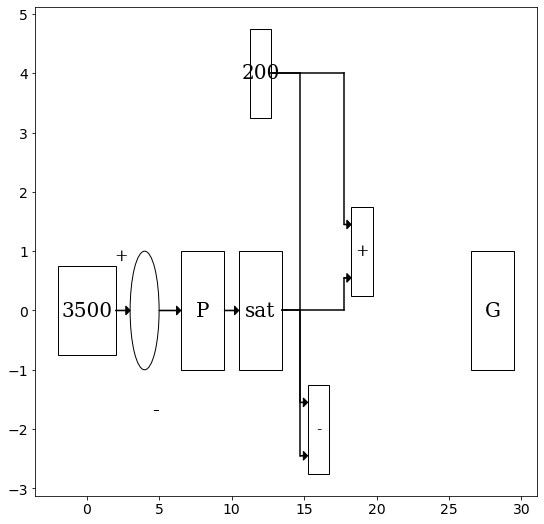

In [53]:
mysys.draw()

In [54]:
satP = pybd.saturation_block(mymax=400,label="satP",variable_name="satP")

In [55]:
satP.place_relative(add1,"right")

In [56]:
satP.set_input_block1(add1)

In [57]:
mysys.append_block_to_dict("satP",satP)

In [58]:
satN = pybd.saturation_block(mymax=400,label="satN",variable_name="satN")

In [59]:
satN.place_relative(subtract1,"right")

In [60]:
mysys.append_block_to_dict("satN",satN)

In [61]:
satN.set_input_block1(subtract1)

drawing: U_cl
drawing: sum1_block
drawing: P_block
drawing: G
drawing: sat_block
drawing: v_nom_block
drawing: add_block1
drawing: subtract_block1
drawing: satP
drawing: satN


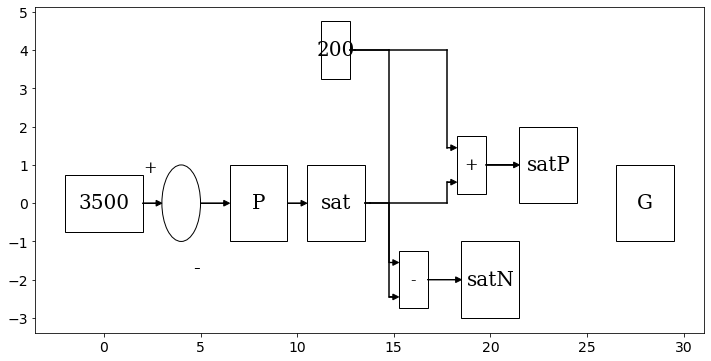

In [62]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
mysys.ax = ax
mysys.draw()

In [63]:
G.set_inputs(satP,satN)

drawing: U_cl
drawing: sum1_block
drawing: P_block
drawing: G
drawing: sat_block
drawing: v_nom_block
drawing: add_block1
drawing: subtract_block1
drawing: satP
drawing: satN


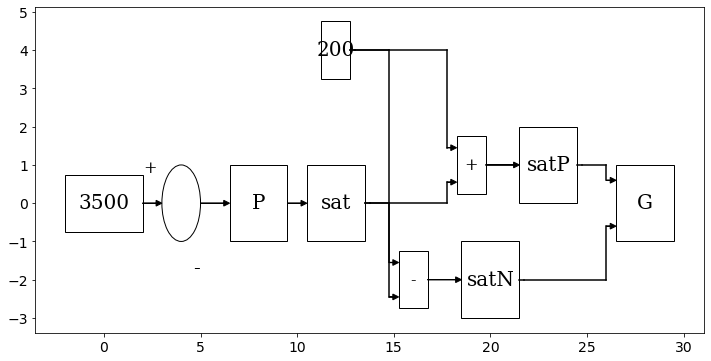

In [64]:
mydraw2()

In [65]:
Y = pybd.output_block("line position",G)

In [66]:
Y.place_relative(G, "right",8)

In [67]:
Y.width = 6

In [68]:
sum1.set_input_block2(G)

In [69]:
mysys.append_block_to_dict("Y",Y)

In [70]:
sum1.fb_vertical_offset = -5

drawing: U_cl
drawing: sum1_block
calling draw_feedback_wire
drawing: P_block
drawing: G
drawing: sat_block
drawing: v_nom_block
drawing: add_block1
drawing: subtract_block1
drawing: satP
drawing: satN
drawing: None


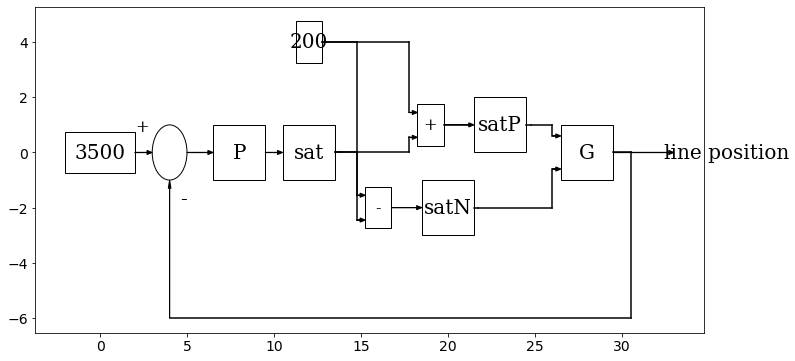

In [71]:
mydraw2()

## Print Blocks

In [72]:
mysys.print_blocks = [sum1,D,sat,add1,subtract1,satP,satN,G]

## Execution Order

In [73]:
mysys.find_execution_order([U,sum1,D,sat,v_nom,add1,subtract1])

In [74]:
mysys.execution_order

## Codegen Test

In [75]:
ls *.py

main.py*                              main_template.py*
main_backup_hbridge_motor_control.py* upybd.py


In [76]:
mysys.generate_python_code("main_auto.py", \
                           "main_template.py", \
                            output_folder='cart_pend_micropython_autogen_1')

In [77]:
U.py_params

['value']

In [78]:
sum1.py_params

[]